In [6]:
import numpy as np
import matplotlib.pyplot as plt

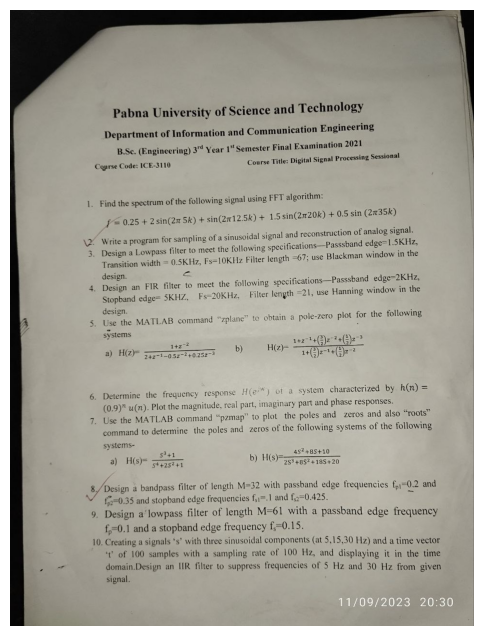

In [9]:
from PIL import Image

# Open an image file
img = Image.open("PQDSP.jpg")
plt.figure(figsize=(13,8))
plt.imshow(img)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

# Answer-1

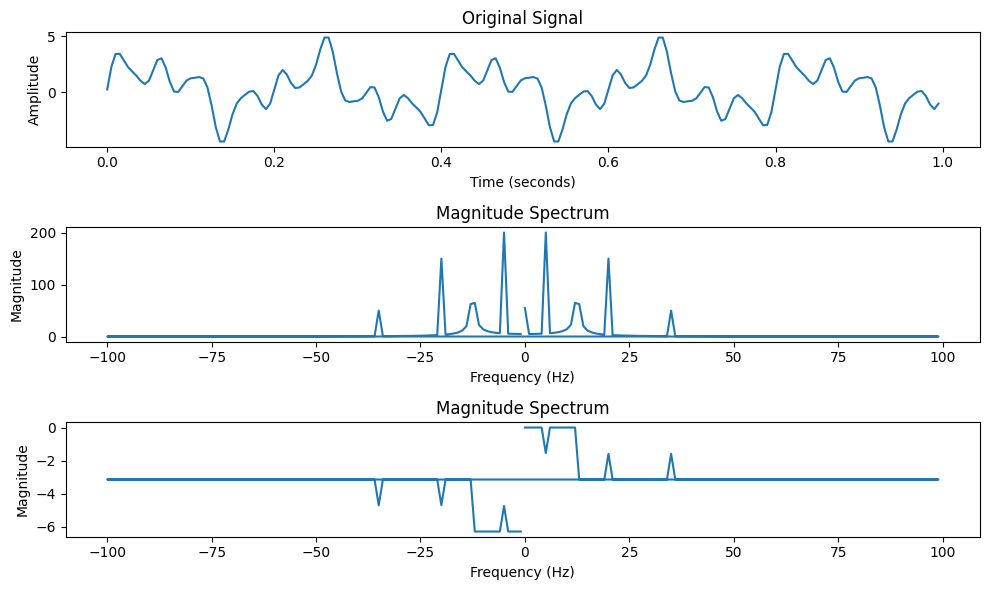

In [16]:
fs = 200
k = np.arange(0,1,1/fs)
f = 0.25+2*np.sin(2*np.pi*5*k)+np.sin(2*np.pi*12.5*k)+1.5*np.sin(2*np.pi*20*k)+0.5*np.sin(2*np.pi*35*k)
# w = np.linspace(0, 2*np.pi, 1024, endpoint=False)
w = np.fft.fftfreq(len(f), d=1/fs)
F = np.fft.fft(f)

plt.figure(figsize=(10, 6))
# Original Signal
plt.subplot(3, 1, 1)
plt.plot(k, f)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Magnitude Spectrum
plt.subplot(3, 1, 2)
plt.plot(w, np.abs(F))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
# Magnitude Spectrum
plt.subplot(3, 1,3)
plt.plot(w, np.unwrap(np.angle(F)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

plt.tight_layout()
plt.show()

# Question-2

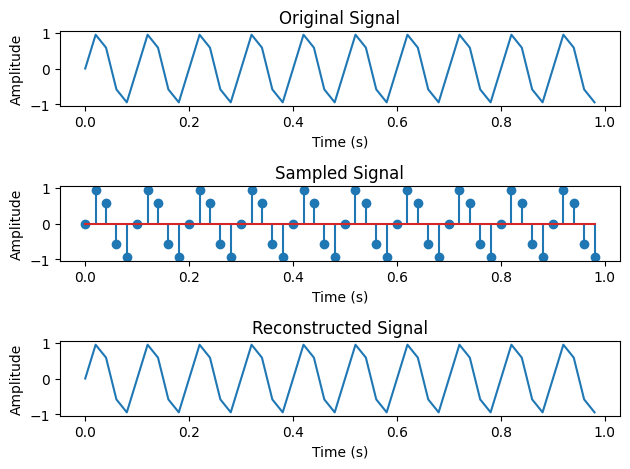

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the sinusoidal signal
f = 10 # signal frequency in Hz
fs = 50 # sampling frequency in Hz
t = np.arange(0, 1, 1/fs)
x = np.sin(2*np.pi*f*t)

# Plot the original signal
plt.subplot(3,1,1)
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original Signal')

# Sample the signal
Ts = 1/fs  # Sampling interval (in seconds)
n = np.arange(0, 1, Ts)
xn = np.sin(2*np.pi*f*n)

# Plot the sampled signal
plt.subplot(3,1,2)
plt.stem(n, xn)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sampled Signal')

# Reconstruct the analog signal using ideal reconstruction
xr = np.zeros_like(t)  # Initialize the reconstructed signal
for i in range(len(n)):
    xr += xn[i] * np.sinc((t - i*Ts) / Ts)

# Plot the reconstructed signal
plt.subplot(3,1,3)
plt.plot(t, xr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Reconstructed Signal')

plt.tight_layout()
plt.show()

# Question-3
FIR Lowpass

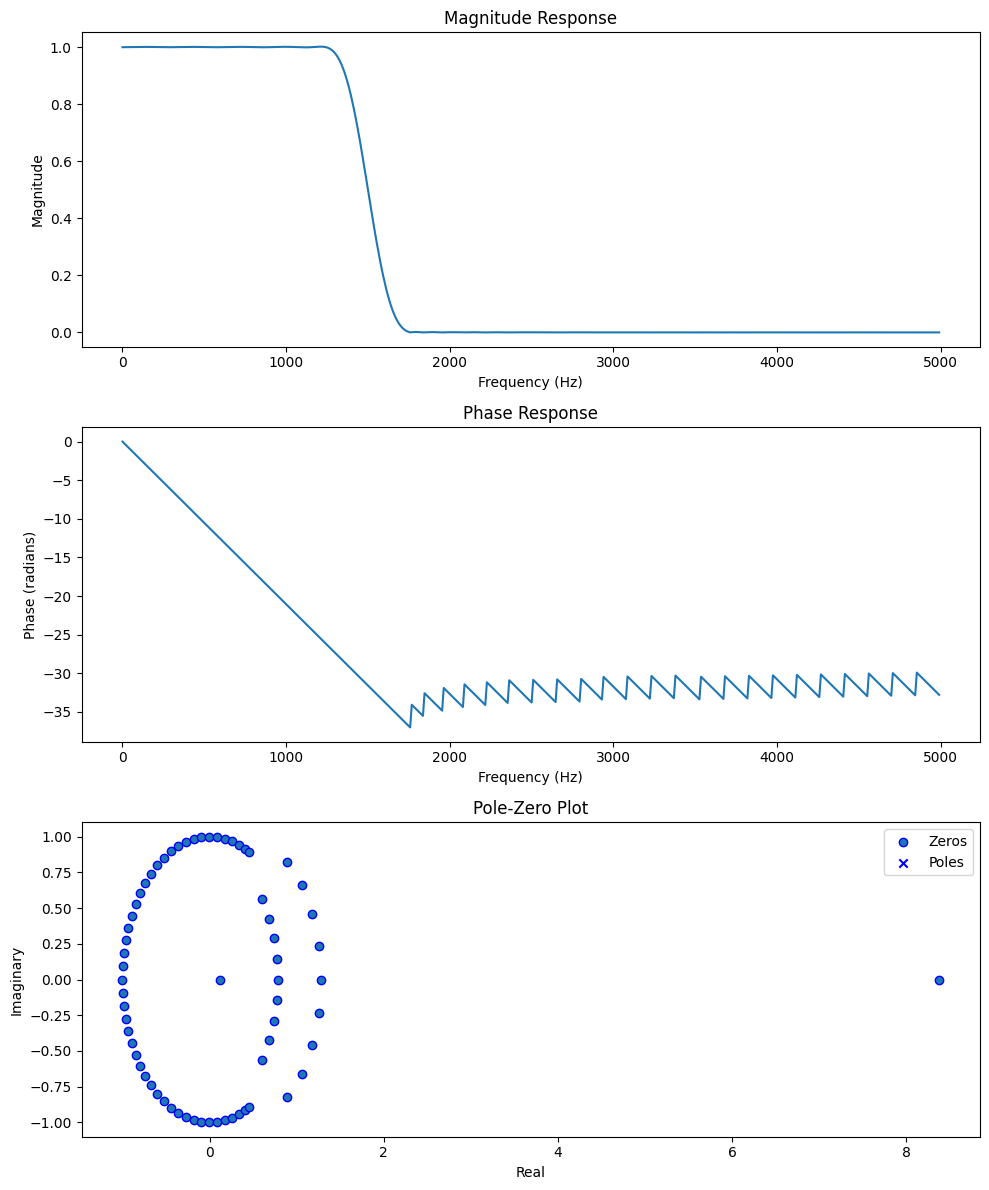

In [12]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Filter specifications
fs = 10000  # sampling rate
N = 67  # order of filter
fc = 1500  # passband edge frequency
transition_width = 500  # transition width
window = 'blackman'  # window function

# Design the filter using the specified parameters
b = sig.firwin(N + 1, fc, fs=fs, window=window, pass_zero='lowpass', width=transition_width)

# Frequency response
w, h_freq = sig.freqz(b, fs=fs)

# Poles and Zeros
z, p, k = sig.tf2zpk(b, 1)

# Plotting
plt.figure(figsize=(10, 12))

# Magnitude Response
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h_freq))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Response')

# Phase Response
plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h_freq)))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response')

# Pole-Zero Plot
plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b', label='Poles')
plt.legend()
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')

plt.tight_layout()
plt.show()


IIR Lowpass

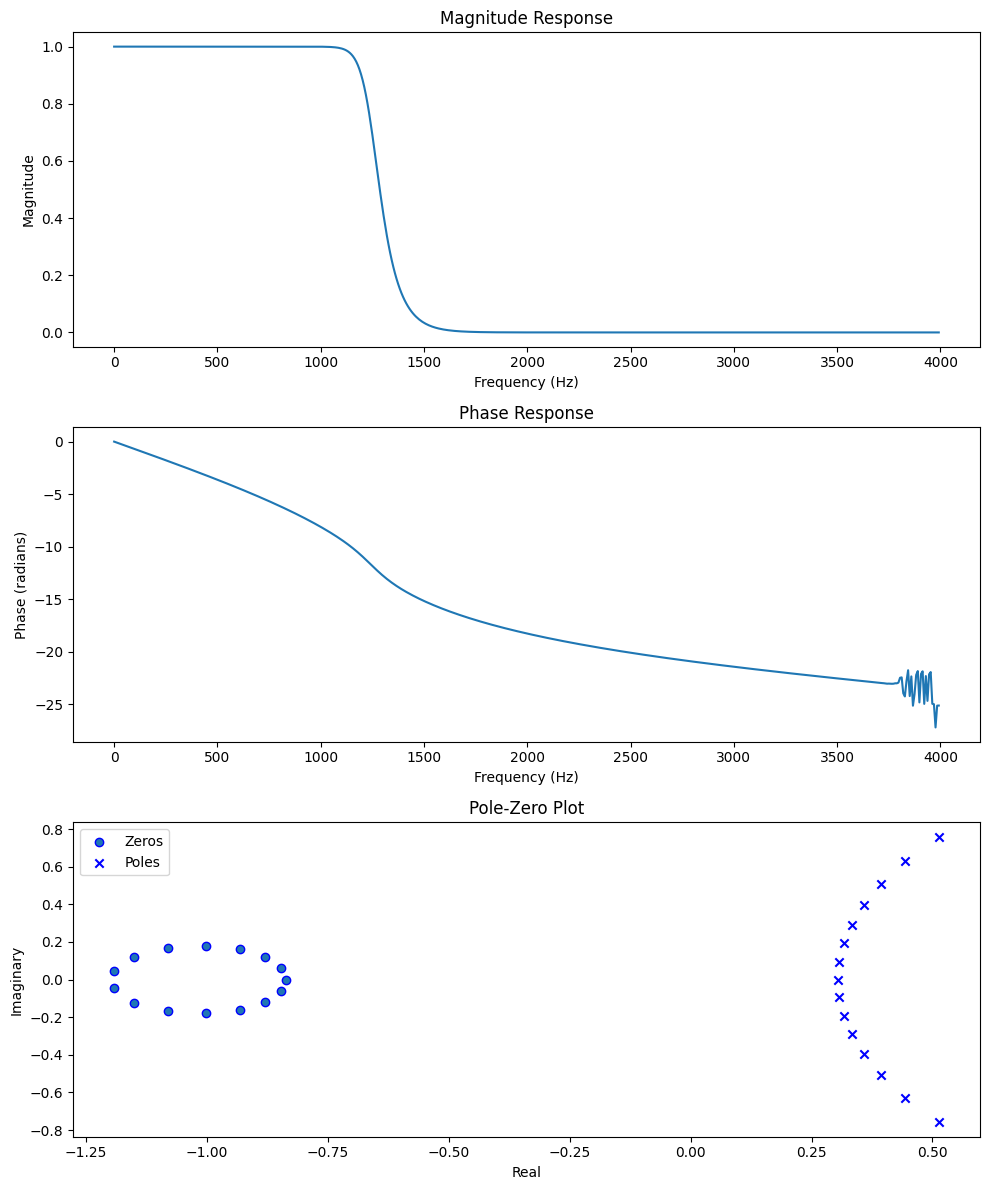

In [27]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Filter specifications
fs = 8000
low_cutoff = 1200
high_cutoff = 1700
ripple = 1  # dB
order, wn = sig.buttord(low_cutoff / (fs / 2), high_cutoff / (fs / 2), ripple, 50)
b, a = sig.butter(order, wn)

# Frequency response
w, h = sig.freqz(b, a, 512, fs=fs)

# Poles and Zeros
z, p, k = sig.tf2zpk(b, a)

# Plotting
plt.figure(figsize=(10, 12))

# Magnitude Response
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h))
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Phase Response
plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h)))
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

# Pole-Zero Plot
plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b', label='Poles')
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()

plt.tight_layout()
plt.show()


# Question-4

C:\Users\sajee\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\signal\_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


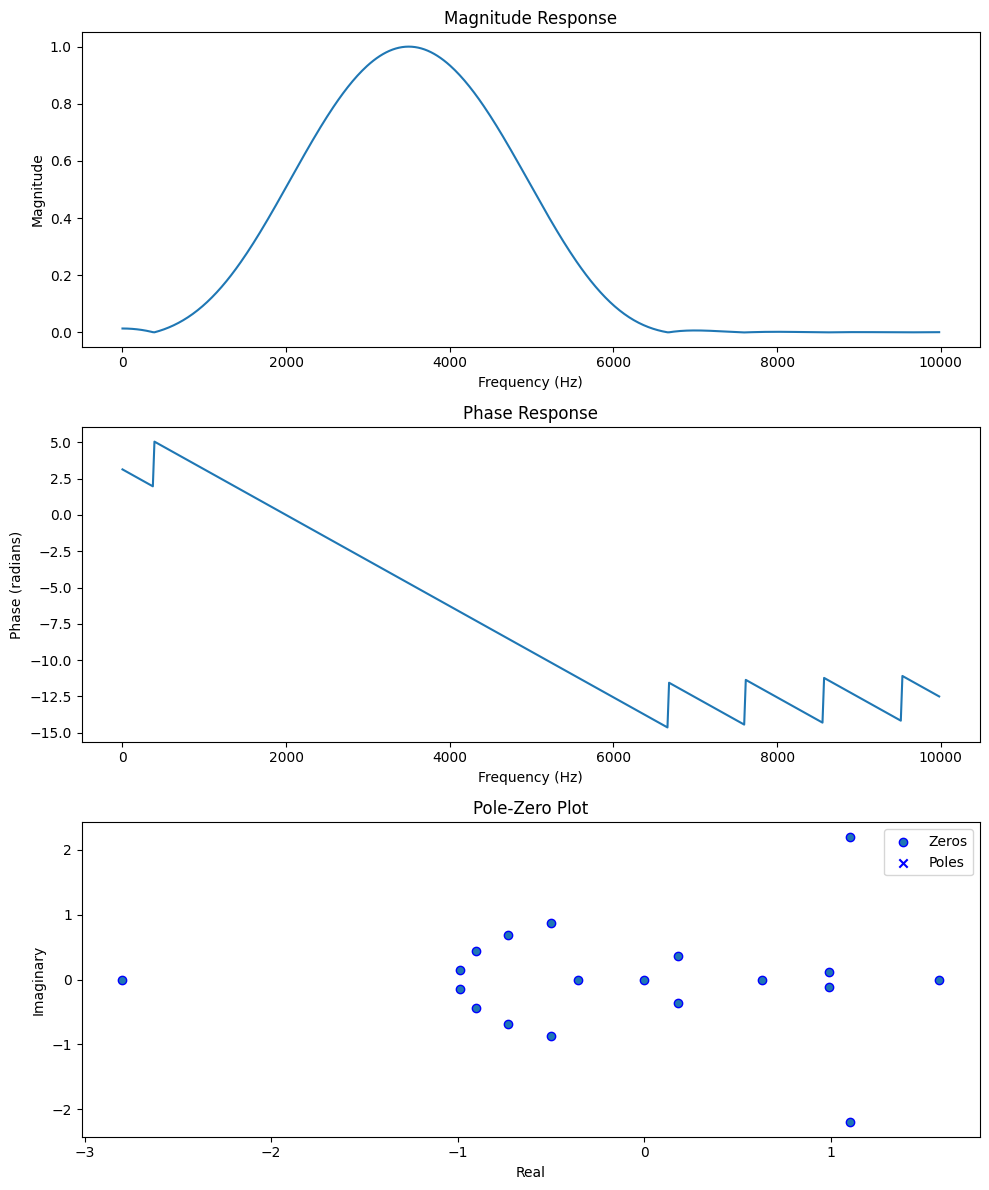

In [29]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Filter specifications
fs = 20000
filter_length = 21
passband_edge = 2000
stopband_edge = 5000

# Design the filter using the specified parameters
fc = np.array([passband_edge, stopband_edge])
b = sig.firwin(filter_length, fc, fs=fs, window='hann', pass_zero='bandpass')

# Frequency response
w, h_freq = sig.freqz(b, fs=fs)

# Poles and Zeros
z, p, k = sig.tf2zpk(b, 1)

# Plotting
plt.figure(figsize=(10, 12))

# Magnitude Response
plt.subplot(3, 1, 1)
plt.plot(w, np.abs(h_freq))
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Phase Response
plt.subplot(3, 1, 2)
plt.plot(w, np.unwrap(np.angle(h_freq)))
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

# Pole-Zero Plot
plt.subplot(3, 1, 3)
plt.scatter(np.real(z), np.imag(z), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(p), np.imag(p), marker='x', color='b', label='Poles')
plt.title('Pole-Zero Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()

plt.tight_layout()
plt.show()

# Question-5

for obtaining a pole-zero plot for the given system H(Z) = (1+z^-2)/(2+z^-1 - 0.5z^-2 + 0.25z^-3)

[-0.91964338+0.j          0.20982169+0.30314536j  0.20982169-0.30314536j]
[-0.+1.j  0.-1.j]


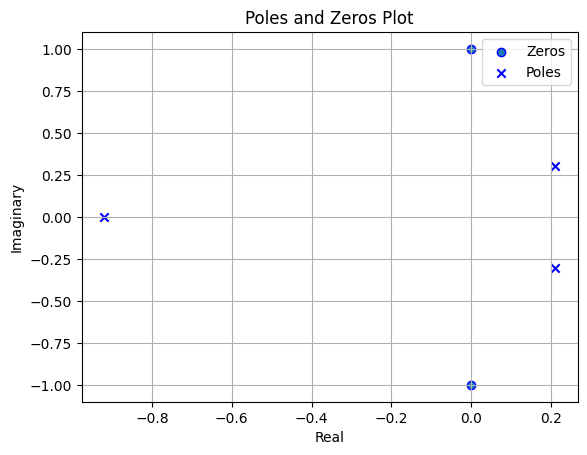

In [15]:
numerator_coefficients = [1, 0, 1]
denominator_coefficients = [2, 1, -0.5, 0.25]
# Convert transfer function to zero-pole-gain form
zeros, poles, gain = sig.tf2zpk(numerator_coefficients, denominator_coefficients)

# Plot poles and zeros
print(poles)
print(zeros)
plt.scatter(np.real(zeros), np.imag(zeros), edgecolors='b', marker='o', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), color='b', marker='x', label='Poles')
plt.title('Poles and Zeros Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid(True)
plt.show()


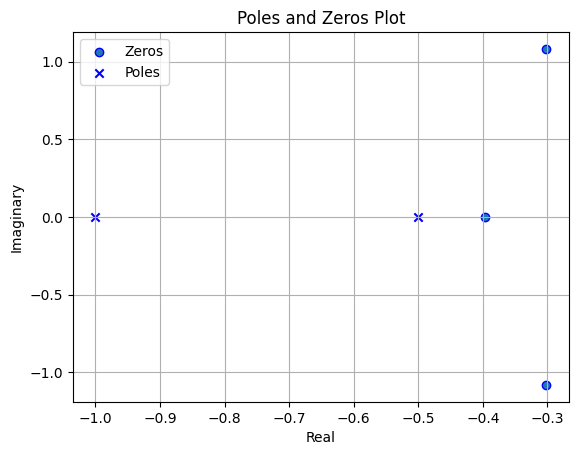

In [16]:
numerator_coefficients = [1, 1, 3/2, 1/2]
denominator_coefficients = [1, 3/2, 1/2]
# Convert transfer function to zero-pole-gain form
zeros, poles, gain = sig.tf2zpk(numerator_coefficients, denominator_coefficients)

# Plot poles and zeros
plt.scatter(np.real(zeros), np.imag(zeros), edgecolors='b', marker='o', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), color='b', marker='x', label='Poles')
plt.title('Poles and Zeros Plot')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.grid(True)
plt.show()

# Question-6
Define the impulse response h(n)=(0.9)n⋅u(n)h(n)=(0.9)n⋅u(n) as a lambda function. Here, u(n)u(n) is the unit step function, ensuring that the response is zero for negative values of nn.

Calculate the frequency response using scipy.signal.freqz. The function takes the list comprehension [h_n(n) for n in range(50)] to generate the first 50 values of h(n)h(n) and calculates the frequency response (h_freq) for 512 points.

The plt.tight_layout() ensures that the subplots are properly spaced.

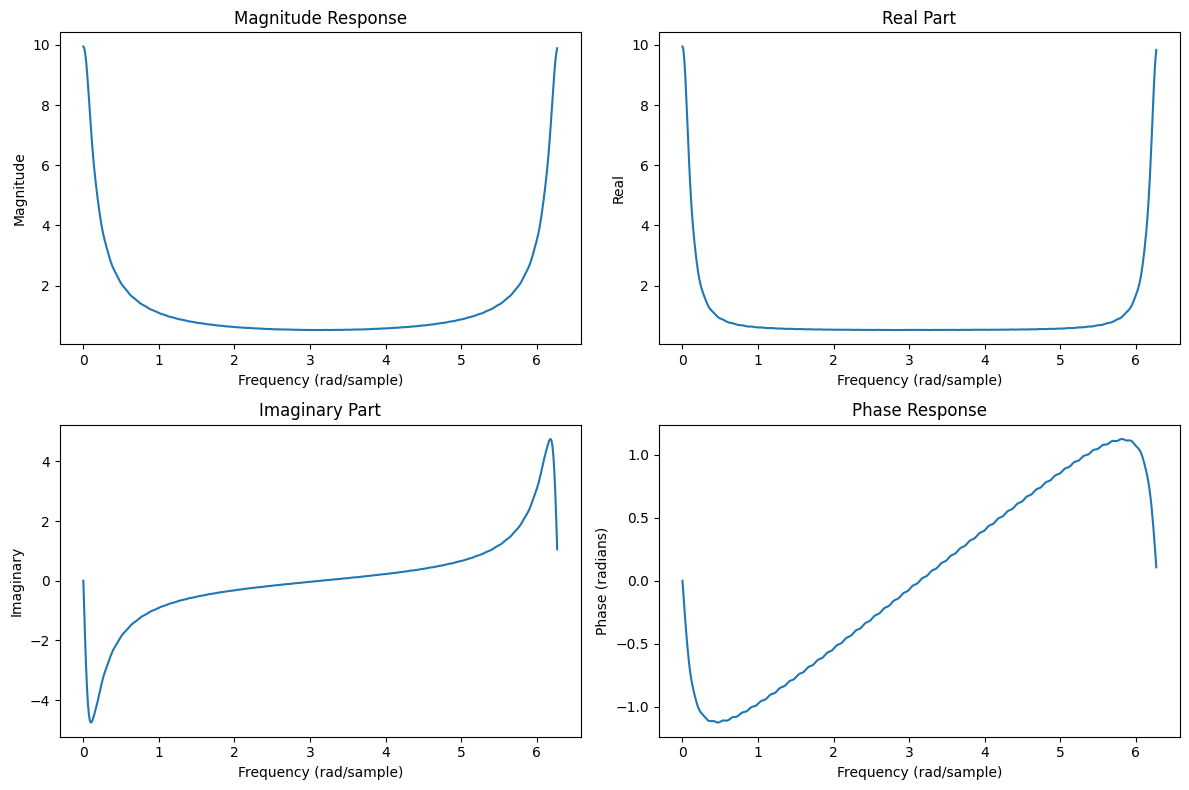

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Given impulse response h(n) = (0.9)^n * u(n)
h_n = lambda n: (0.9)**n * (n >= 0)

# Frequency response calculation
w, h_freq = freqz([h_n(n) for n in range(50)], worN=512, whole=True)

# Plotting
plt.figure(figsize=(12, 8))

# Magnitude Response
plt.subplot(2, 2, 1)
plt.plot(w, np.abs(h_freq))
plt.title('Magnitude Response')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude')

# Real Part
plt.subplot(2, 2, 2)
plt.plot(w, np.real(h_freq))
plt.title('Real Part')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Real')

# Imaginary Part
plt.subplot(2, 2, 3)
plt.plot(w, np.imag(h_freq))
plt.title('Imaginary Part')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Imaginary')

# Phase Response
plt.subplot(2, 2, 4)
plt.plot(w, np.angle(h_freq))
plt.title('Phase Response')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()


# Question-7
Use the matlab command pzmap to plot the poles and zeros and also "roots" command to determine the poles and zeros of the following systems of the following system
H(s) = (s^3 + 1)/(s^4 + 2*s^2 +1)

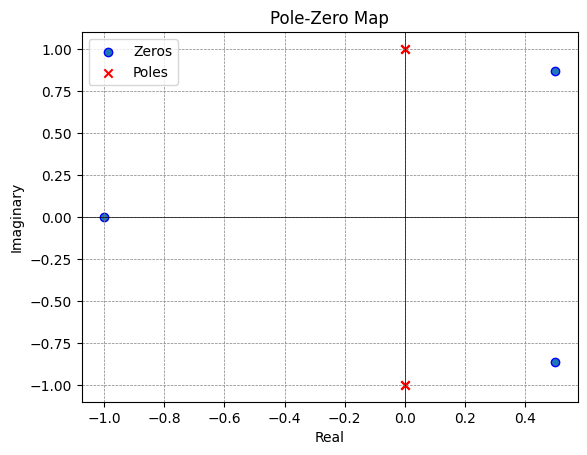

Zeros: [-1. +0.j         0.5+0.8660254j  0.5-0.8660254j]
Poles: [-5.95902841e-12+1.00000001j -5.95902841e-12-1.00000001j
  5.95895902e-12+0.99999999j  5.95895902e-12-0.99999999j]


In [30]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# System transfer function coefficients
numerator = [1, 0, 0, 1]   # Coefficients for s^3 + 1
denominator = [1, 0, 2, 0, 1]   # Coefficients for s^4 + 2*s^2 + 1

# Obtain zeros, poles, and gain from transfer function coefficients
zeros, poles, gain = signal.tf2zpk(numerator, denominator)

# Plot the pole-zero map
plt.figure()
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles')
plt.title('Pole-Zero Map')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# Display zeros and poles
print("Zeros:", zeros)
print("Poles:", poles)

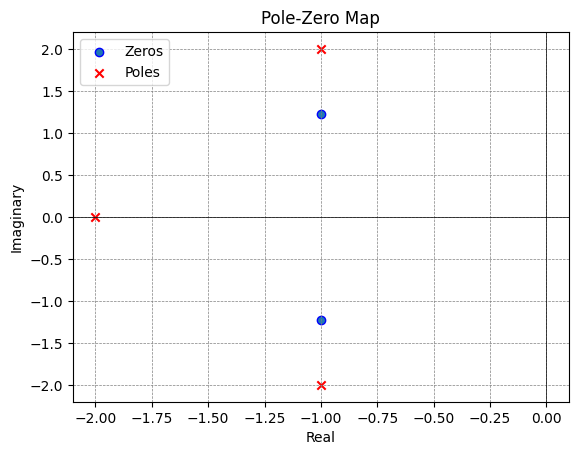

Zeros: [-1.+1.22474487j -1.-1.22474487j]
Poles: [-1.+2.j -1.-2.j -2.+0.j]


In [31]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# System transfer function coefficients
numerator = [4, 8, 10] 
denominator = [2,8,18,20]
# Obtain zeros, poles, and gain from transfer function coefficients
zeros, poles, gain = signal.tf2zpk(numerator, denominator)

# Plot the pole-zero map
plt.figure()
plt.scatter(np.real(zeros), np.imag(zeros), marker='o', edgecolors='b', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), marker='x', color='r', label='Poles')
plt.title('Pole-Zero Map')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

# Display zeros and poles
print("Zeros:", zeros)
print("Poles:", poles)


# Question-8
Design a bandpass filter of length M=32 with passband edge frequencies fp1 = 0.2 and fp2=0.35 and stopband edge frequencies fs1 = 0.1 and fs2 = 0.425

    Design the bandpass filter using the scipy.signal.firwin function. The function     takes the following arguments:

    M + 1: Filter length (number of taps).
    [fs1, fp1, fp2, fs2]: List of band edge frequencies. Here, fp1 and fp2 are passband edges, and fs1 and fs2 are stopband edges.
    pass_zero=False: Indicates that it's a bandpass filter.

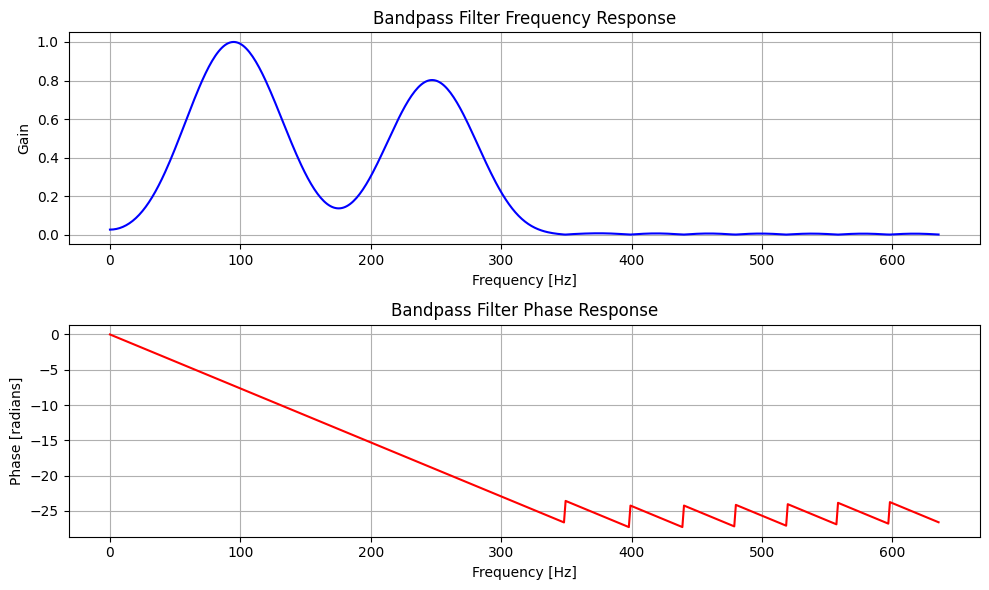

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Filter specifications
fs = 8000
M = 32  # Filter length
fp1, fp2 = 0.2, 0.35  # Passband edge frequencies
fs1, fs2 = 0.1, 0.425  # Stopband edge frequencies

# Designing a bandpass filter using the window method
h = sig.firwin(M, [fs1, fp1, fp2, fs2], pass_zero='bandpass')

# Frequency response
w, h_freq = sig.freqz(h, fs=fs)

# Plot the magnitude response
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(0.5 * w / np.pi, np.abs(h_freq), 'b') # w/2*pi means the angular frequency converted into normal frequency
plt.title('Bandpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()

# Plot the phase response
plt.subplot(2, 1, 2)
plt.plot(0.5 * w / np.pi, np.unwrap(np.angle(h_freq)), 'r')
plt.title('Bandpass Filter Phase Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid()

plt.tight_layout()
plt.show()


# Question-9 
Design a lowpass filter of length M=61 with a passband edge frequency fp = 0.1 and a stopband edge frequency fs = 0.15

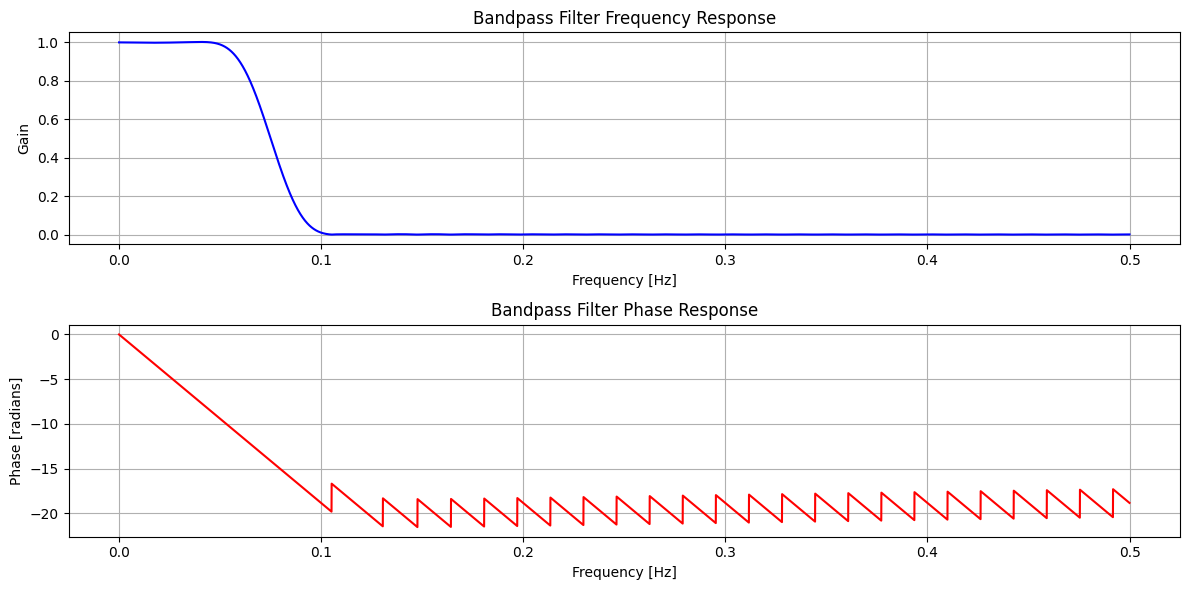

In [25]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

# Filter specifications
M = 61  # Filter length
fp = 0.1  # Passband edge frequency
fs = 0.15  # Stopband edge frequency

# Design the lowpass filter
b = sig.firwin(M, fs, pass_zero=True)

# Frequency response
w, h_freq = sig.freqz(b, worN=8000)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(0.5 * w / np.pi, np.abs(h_freq), 'b') # w/2*pi means the angular frequency converted into normal frequency
plt.title('Bandpass Filter Frequency Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()

# Plot the phase response
plt.subplot(2, 1, 2)
plt.plot(0.5 * w / np.pi, np.unwrap(np.angle(h_freq)), 'r')
plt.title('Bandpass Filter Phase Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [radians]')
plt.grid()

plt.tight_layout()
plt.show()


# Question-10
Creating a signal 's' with three sinusoidal components (at 5,15,30Hz) and time vector t of 100 samples  with a sampling rate of 100Hz , and displaying it in the domain. Design an IIR filter to supress freaquencies of 5Hz and 30 Hz from given signal

    Design a 4th-order Butterworth bandstop (notch) filter to suppress frequencies of 5 Hz and 30 Hz. The N parameter represents the filter order, and Wn represents the normalized cutoff frequencies.

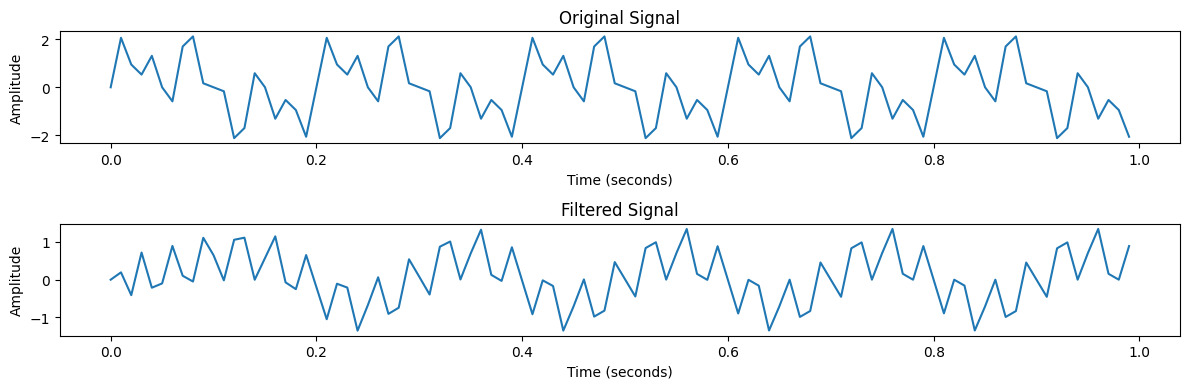

In [29]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Signal parameters
fs = 100  # Sampling rate in Hz
t = np.arange(0, 1, 1/fs)  # Time vector with 100 samples

# Create a signal with three sinusoidal components
s = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t) + np.sin(2 * np.pi * 30 * t)

# Display the original signal
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(t, s)
plt.title('Original Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

# Design an IIR filter to suppress frequencies of 5 Hz and 30 Hz
frequencies_to_suppress = [5, 30]  # Frequencies to suppress in Hz
nyquist = 0.5 * fs
cutoff_normalized = [f / nyquist for f in frequencies_to_suppress]

b, a = signal.butter(N=4, Wn=cutoff_normalized, btype='bandstop', analog=False)

# Apply the filter to the signal
filtered_signal = signal.lfilter(b, a, s)

# Display the filtered signal
plt.subplot(2, 1, 2)
plt.plot(t, filtered_signal)
plt.title('Filtered Signal')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
